In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

###  Предобработка данных

In [3]:
df = pd.read_csv('song_lyrics.csv')
df

,title,tag,artist,year,views,features,lyrics,id,language_cld3,language_ft,language
0,Killa Cam,rap,Cam'ron,2004,173166,"{""Cam\\'ron"",""Opera Steve""}","[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...",1,en,en,en
1,Can I Live,rap,JAY-Z,1996,468624,{},"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,...",3,en,en,en
2,Forgive Me Father,rap,Fabolous,2003,4743,{},Maybe cause I'm eatin\nAnd these bastards fien...,4,en,en,en
3,Down and Out,rap,Cam'ron,2004,144404,"{""Cam\\'ron"",""Kanye West"",""Syleena Johnson""}",[Produced by Kanye West and Brian Miller]\n\n[...,5,en,en,en
4,Fly In,rap,Lil Wayne,2005,78271,{},"[Intro]\nSo they ask me\n""Young boy\nWhat you ...",6,en,en,en
...,...,...,...,...,...,...,...,...,...,...,...
5134851,Ocean,pop,Effemar,2022,3,{},[Verse 1]\nDance for me now\nKeeping yourself ...,7882842,en,en,en
5134852,64 Bars,rap,Rapido,2022,4,{},"[Intro]\n\nJa, ja\n\n[Part 1]\n\nR-A-H, Merhab...",7882843,de,de,de
5134853,Raise Our Hands,pop,"Culture Code, Pag & Mylo",2016,3,"{Elex,""Culture Code / Pag & Mylo""}",[Verse 1]\nHere our purpose feels alive\nWe ar...,7882845,en,en,en
5134854,CEO,rap,Antropolita,2022,5,{},Jestem CEO w tym\nTo jara twoją bitch\nNikt na...,7882846,pl,pl,pl


In [4]:
# Проверяем распределение по языкам и выбираем английский
# df['language_cld3'].value_counts()
# df['language_ft'].value_counts()
df['language'].value_counts()

language
en     3374198
es      275432
fr      189436
pt      167947
ru      166044
de      160150
it      118775
pl       83862
tr       44692
ja       42637
sv       32754
nl       31289
ko       27979
fi       24415
da       18507
he       14018
el       12072
ar        9889
cs        9110
no        9056
zh        8813
hu        8744
vi        8740
ro        8532
fa        8508
fil       7190
lv        5120
az        4508
sk        4180
ca        3963
id        2774
is        2214
uk        2208
bg        2139
lt        1940
hi        1609
et        1533
th        1194
af        1161
sq        1057
eu         983
ne         967
ta         646
mk         594
bn         579
sl         572
hr         513
ka         443
la         426
sr         384
ga         362
my         358
si         302
be         226
gl         223
mn         197
cy         193
eo         192
kk         178
hy         174
pa         131
ku         115
ceb        102
te          92
ky          81
fy          74
a

In [5]:
df = df[df['language'] == 'en']
df

,title,tag,artist,year,views,features,lyrics,id,language_cld3,language_ft,language
0,Killa Cam,rap,Cam'ron,2004,173166,"{""Cam\\'ron"",""Opera Steve""}","[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...",1,en,en,en
1,Can I Live,rap,JAY-Z,1996,468624,{},"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,...",3,en,en,en
2,Forgive Me Father,rap,Fabolous,2003,4743,{},Maybe cause I'm eatin\nAnd these bastards fien...,4,en,en,en
3,Down and Out,rap,Cam'ron,2004,144404,"{""Cam\\'ron"",""Kanye West"",""Syleena Johnson""}",[Produced by Kanye West and Brian Miller]\n\n[...,5,en,en,en
4,Fly In,rap,Lil Wayne,2005,78271,{},"[Intro]\nSo they ask me\n""Young boy\nWhat you ...",6,en,en,en
...,...,...,...,...,...,...,...,...,...,...,...
5134847,Everything Is Alright Now,pop,Chuck Bernard,2013,2,{},"Everything is alright now\nOh yes, baby\nEvery...",7882838,en,en,en
5134849,White Lies,pop,ElementD,2019,1,"{""Harley Bird""}",[Verse 1]\nHalf truth and half you\nDidn't we ...,7882840,en,en,en
5134851,Ocean,pop,Effemar,2022,3,{},[Verse 1]\nDance for me now\nKeeping yourself ...,7882842,en,en,en
5134853,Raise Our Hands,pop,"Culture Code, Pag & Mylo",2016,3,"{Elex,""Culture Code / Pag & Mylo""}",[Verse 1]\nHere our purpose feels alive\nWe ar...,7882845,en,en,en


In [6]:
# Отбираем информативные столбцы, среди которых 'lyrics' - текстовый столбец для обучения и 'tag' в качестве целевого столбца
df = df[['title', 'artist', 'year', 'lyrics', 'tag']]
df

,title,artist,year,lyrics,tag
0,Killa Cam,Cam'ron,2004,"[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...",rap
1,Can I Live,JAY-Z,1996,"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,...",rap
2,Forgive Me Father,Fabolous,2003,Maybe cause I'm eatin\nAnd these bastards fien...,rap
3,Down and Out,Cam'ron,2004,[Produced by Kanye West and Brian Miller]\n\n[...,rap
4,Fly In,Lil Wayne,2005,"[Intro]\nSo they ask me\n""Young boy\nWhat you ...",rap
...,...,...,...,...,...
5134847,Everything Is Alright Now,Chuck Bernard,2013,"Everything is alright now\nOh yes, baby\nEvery...",pop
5134849,White Lies,ElementD,2019,[Verse 1]\nHalf truth and half you\nDidn't we ...,pop
5134851,Ocean,Effemar,2022,[Verse 1]\nDance for me now\nKeeping yourself ...,pop
5134853,Raise Our Hands,"Culture Code, Pag & Mylo",2016,[Verse 1]\nHere our purpose feels alive\nWe ar...,pop


In [7]:
# Проверяем распределение по годам и выбираем 1960 +
df['year'].unique()

array([2004, 1996, 2003, 2005, 2008, 2002, 1998, 2000, 1999, 1993, 1997,
       2007, 2009, 2006, 1994, 1995, 2001, 1992, 2010, 2011, 1965, 1981,
       1988, 1990, 1991, 1987, 1979, 1989, 1982, 2013, 1975, 1977, 1972,
       2016, 1976, 1971, 2012, 1980, 1968, 1967, 1974, 1984, 1969, 1978,
       2017, 1878, 1951, 1920, 1891, 1916, 1915, 1966, 1816, 1970, 1914,
       1681, 1956, 1985, 1983, 1789,    2, 1609, 2014, 1973, 1923, 1986,
       2015, 1788, 1871, 1810, 2019, 1962, 2020, 1798, 2018, 1953, 1963,
       1824, 2021,   90, 1667, 1815, 1964, 1954, 1803, 1215, 1885, 1863,
       1960, 1595, 1936, 1645, 1807, 1926, 1818, 1913, 1934, 1939, 1940,
       1890, 1896, 1958, 1961, 1886, 1862, 1604, 1875, 1599, 1851, 1959,
       1925, 1819, 1603, 1957, 1855, 1845, 1849, 1844, 1827, 1831, 1955,
       1928, 1947, 1865, 1917, 1850, 1860, 1623, 1922, 1817, 1952, 1909,
       1854, 1814, 1759, 1532, 1785, 1633, 2022, 1859, 1820, 1686, 1687,
          1, 1611, 1775, 1848, 1812,  976, 1927, 19

In [8]:
df = df[df['year'] >= 1960]
display(df['year'].unique())
df

array([2004, 1996, 2003, 2005, 2008, 2002, 1998, 2000, 1999, 1993, 1997,
       2007, 2009, 2006, 1994, 1995, 2001, 1992, 2010, 2011, 1965, 1981,
       1988, 1990, 1991, 1987, 1979, 1989, 1982, 2013, 1975, 1977, 1972,
       2016, 1976, 1971, 2012, 1980, 1968, 1967, 1974, 1984, 1969, 1978,
       2017, 1966, 1970, 1985, 1983, 2014, 1973, 1986, 2015, 2019, 1962,
       2020, 2018, 1963, 2021, 1964, 1960, 1961, 2022, 2027, 2023, 2024,
       2100, 2057], dtype=int64)

,title,artist,year,lyrics,tag
0,Killa Cam,Cam'ron,2004,"[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...",rap
1,Can I Live,JAY-Z,1996,"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,...",rap
2,Forgive Me Father,Fabolous,2003,Maybe cause I'm eatin\nAnd these bastards fien...,rap
3,Down and Out,Cam'ron,2004,[Produced by Kanye West and Brian Miller]\n\n[...,rap
4,Fly In,Lil Wayne,2005,"[Intro]\nSo they ask me\n""Young boy\nWhat you ...",rap
...,...,...,...,...,...
5134847,Everything Is Alright Now,Chuck Bernard,2013,"Everything is alright now\nOh yes, baby\nEvery...",pop
5134849,White Lies,ElementD,2019,[Verse 1]\nHalf truth and half you\nDidn't we ...,pop
5134851,Ocean,Effemar,2022,[Verse 1]\nDance for me now\nKeeping yourself ...,pop
5134853,Raise Our Hands,"Culture Code, Pag & Mylo",2016,[Verse 1]\nHere our purpose feels alive\nWe ar...,pop


In [9]:
# Проверяем наличие пустых значений в столбцах и смотрим пропуски в 'title'
df.isnull().sum()

title     127
artist      0
year        0
lyrics      0
tag         0
dtype: int64

In [10]:
df[df['title'].isna()].head()

,title,artist,year,lyrics,tag
55462,NaN,Boojee,2011,What I wanna do I wanna make it out of school\...,rap
91554,NaN,IUZ,2012,[Verse 1]\nShe said life ain't about smoking w...,misc
97756,NaN,Touch Amor,2011,I'm parting the sea between brightness and me\...,rock
215002,NaN,Ahfueaefasf,2013,Intro:\nYea\nForte Dreams\nRap Records\nLets G...,rap
287274,NaN,RATKING,2014,"[Intro:]\n\n[Verse 1: Wiki]\nGraduated, what's...",rap


In [11]:
# Избавляемся от дубликатов по столбу текстов 'lyrics'
df = df.loc[~df.duplicated(subset=['lyrics']), : ]
df

,title,artist,year,lyrics,tag
0,Killa Cam,Cam'ron,2004,"[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...",rap
1,Can I Live,JAY-Z,1996,"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,...",rap
2,Forgive Me Father,Fabolous,2003,Maybe cause I'm eatin\nAnd these bastards fien...,rap
3,Down and Out,Cam'ron,2004,[Produced by Kanye West and Brian Miller]\n\n[...,rap
4,Fly In,Lil Wayne,2005,"[Intro]\nSo they ask me\n""Young boy\nWhat you ...",rap
...,...,...,...,...,...
5134847,Everything Is Alright Now,Chuck Bernard,2013,"Everything is alright now\nOh yes, baby\nEvery...",pop
5134849,White Lies,ElementD,2019,[Verse 1]\nHalf truth and half you\nDidn't we ...,pop
5134851,Ocean,Effemar,2022,[Verse 1]\nDance for me now\nKeeping yourself ...,pop
5134853,Raise Our Hands,"Culture Code, Pag & Mylo",2016,[Verse 1]\nHere our purpose feels alive\nWe ar...,pop


artist
Genius English Translations    13631
The Grateful Dead               2016
Abraham Lincoln                 1466
Lil B                           1308
Frank Zappa                     1252
Gucci Mane                      1240
Lil Wayne                       1202
Guided by Voices                1183
Tendon Levey                    1174
Emily Dickinson                 1171
Juice WRLD                      1167
KIDZ BOP Kids                   1160
Holy Bible (KJV)                1081
Muze Sikk                        966
Johnny Cash                      954
Name: count, dtype: int64

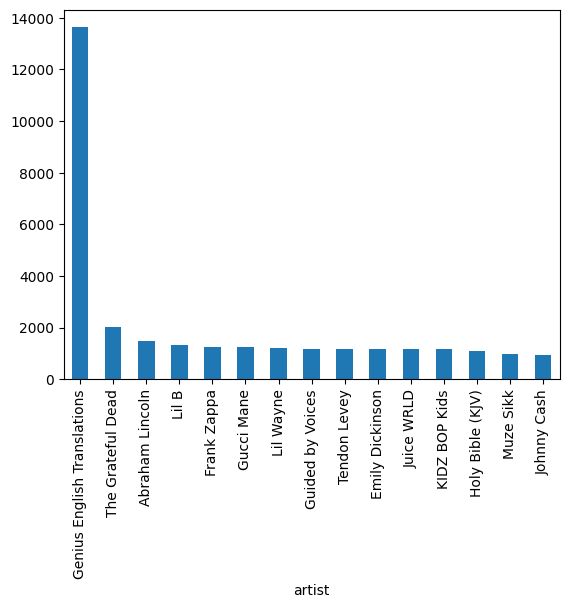

In [12]:
df['artist'].value_counts()[:15].plot.bar(x='artist', y='count', rot=90)
df['artist'].value_counts()[:15]

title
Intro      3173
Home       1734
Alone      1463
You        1256
Stay       1222
Lost       1221
Time       1205
Forever    1165
Ghost      1032
Gone       1005
Tonight     970
Dreams      961
Breathe     948
Goodbye     935
Hold On     922
Name: count, dtype: int64

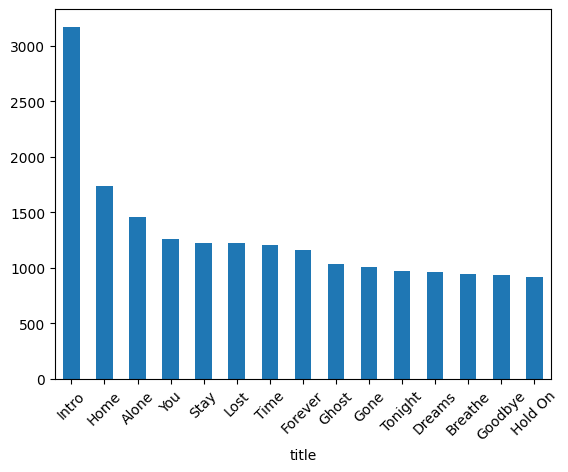

In [13]:
df['title'].value_counts()[:15].plot.bar(x='title', y='count', rot=45)
df['title'].value_counts()[:15]

tag
pop        1342585
rap         961262
rock        625857
rb          153077
misc        116817
country      83005
Name: count, dtype: int64

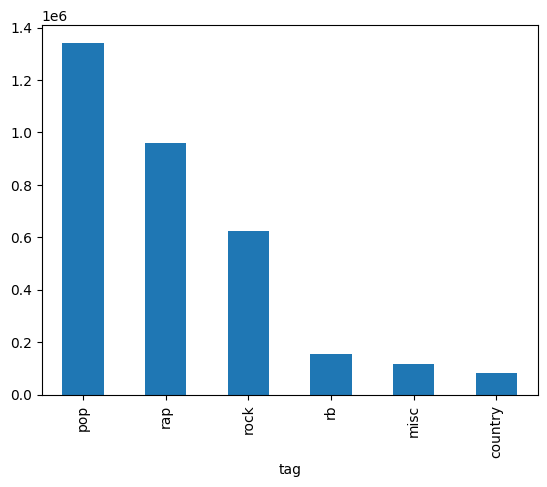

In [14]:
df['tag'].value_counts().plot.bar(x='title', y='count', rot=90)
df['tag'].value_counts()

In [16]:
# Выполняем undersampling по наименьшему классу

li = len(df[df['tag'] == 'country'].index)
inds = []

for i in df['tag'].unique():
    # print(i)
    df_ = df[df['tag'] == i]
    ind = df_.sample(li, random_state=42).index
    # print(ind)
    inds.extend(ind)
    # print(inds)
    
display(df.loc[inds]['tag'].value_counts())
df = df.loc[inds]
df

tag
rap        83005
rb         83005
rock       83005
pop        83005
misc       83005
country    83005
Name: count, dtype: int64

,title,artist,year,lyrics,tag
2203836,Karma,OverDoz.,2017,"[Kent Jamz]:\nWhere you at?\nKarma, give me th...",rap
4975539,History,B2savage,2022,Haha\nHaha\nSquad\n\nPop me a perc i might hav...,rap
212458,Monifere,Gosby,2013,Intro\nJux\nMonifere my babeeeeee\nVanessa\nMs...,rap
2072466,Thank You Apple Juice God,Manast LL' & Blas,2017,[Verse: Manast LL']\nI wouldn't be there\nIf I...,rap
183056,Week 7 reading journal,Djimon sylvester,2013,9/23/13\nI read a book called the loser list. ...,rap
...,...,...,...,...,...
304536,You Dont Know Me,Willie Nelson,2006,[Intro]\nYou don't know me\n\n[Chorus]\nYou gi...,country
3162737,In the Promised Land,Angela Autumn,2019,I'm gonna move far away from the city\nI'm gon...,country
4749026,I Think I Love Her,Kidd G,2021,[Intro]\n(I think I love her)\n\n[Chorus]\nOne...,country
175479,Train 10,Tim McGraw,2007,[Verse 1]\nI'm going to ride that iron horse i...,country


In [17]:
df_class = df.copy()
df_class

,title,artist,year,lyrics,tag
2203836,Karma,OverDoz.,2017,"[Kent Jamz]:\nWhere you at?\nKarma, give me th...",rap
4975539,History,B2savage,2022,Haha\nHaha\nSquad\n\nPop me a perc i might hav...,rap
212458,Monifere,Gosby,2013,Intro\nJux\nMonifere my babeeeeee\nVanessa\nMs...,rap
2072466,Thank You Apple Juice God,Manast LL' & Blas,2017,[Verse: Manast LL']\nI wouldn't be there\nIf I...,rap
183056,Week 7 reading journal,Djimon sylvester,2013,9/23/13\nI read a book called the loser list. ...,rap
...,...,...,...,...,...
304536,You Dont Know Me,Willie Nelson,2006,[Intro]\nYou don't know me\n\n[Chorus]\nYou gi...,country
3162737,In the Promised Land,Angela Autumn,2019,I'm gonna move far away from the city\nI'm gon...,country
4749026,I Think I Love Her,Kidd G,2021,[Intro]\n(I think I love her)\n\n[Chorus]\nOne...,country
175479,Train 10,Tim McGraw,2007,[Verse 1]\nI'm going to ride that iron horse i...,country


In [3]:
import re
from itertools import chain
import pymorphy3
import nltk
from stop_words import get_stop_words

SS = nltk.stem.SnowballStemmer('english') # стемизатор
WORD = re.compile(r'\w+')

# Функция для токенизации и фильтрации текстов
def _reg_tokenize(text):
    """
    Функция токенизации текста на основе регулярных выражений
    """
    words = WORD.findall(text)
    return words

def get_tokens(text):
    """
    Функция токенизации текста, а также фильтрации и нормализации токенов
    Параметры:
        text : str, текст
    Возвращает:
        tokens : list, список отфильтрованных токенов
    """
    text = text.replace(r'([^\w\s]+)', ' \\1 ').strip().lower() # вклинивание пробелов между словами и знаками препинания, приведение к нижнему регистру
    # print(text)
    tokens = _reg_tokenize(text) # токенизация
    # print(tokens)
    tokens = [element for element in list(chain(*[re.split(r'\W+', element) for element in tokens])) if element != ''] # разделение составных элементов слов #####
    # print(tokens)
    tokens = list(chain(*[re.findall(r'\d+|\D+', element) if element.isalnum() else element for element in tokens])) # разбиение токенов, состоящих из букв и цифр
    # print(tokens)
    return tokens

In [19]:
# Ограничение количества токенов в каждой строке
n = 100

# Преобразования текстов последних уровней каталога
df_class['tokens'] = df_class['lyrics'].apply(get_tokens) # получение списка токенов
# Количество уникальных токенов tokens
print('tokens', df_class['tokens'].explode().nunique())

# df_class['tokens_n'] = df_class['tokens'].apply(lambda x: x[:n])
# # Количество уникальных токенов tokens n
# print('tokens_n', df_class['tokens_n'].explode().nunique())

# df_class['words_tokens_n'] = df_class['tokens'].apply(lambda x: list(filter(str.isalpha, x))[:n])
# # Количество уникальных токенов words_tokens
# print('words_tokens_n', df_class['words_tokens_n'].explode().nunique())

# df_class['text_tokens'] = df_class['tokens_n'].apply(lambda x: ' '.join(x))
# df_class['words_tokens'] = df_class['words_tokens_n'].apply(lambda x: ' '.join(x))


df_class['stem_tokens'] = df_class['tokens'].apply(lambda x: list(map(SS.stem, x))) # получение списка стемированных слов (word_stem_name) из списка слов (word_name)
# Количество уникальных токенов stem_tokens
print('stem_tokens', df_class['stem_tokens'].explode().nunique())

# df_class['stem_tokens_n'] = df_class['stem_tokens'].apply(lambda x: x[:n])
# # Количество уникальных токенов stem_tokens_n
# print('stem_tokens_n', df_class['stem_tokens_n'].explode().nunique())

df_class['words_stem_tokens_n'] = df_class['stem_tokens'].apply(lambda x: list(filter(str.isalpha, x))[:n])
# Количество уникальных токенов stem_tokens_words
print('words_stem_tokens_n', df_class['words_stem_tokens_n'].explode().nunique())

# df_class['text_stem_tokens'] = df_class['stem_tokens_n'].apply(lambda x: ' '.join(x))
df_class['words_stem_tokens'] = df_class['words_stem_tokens_n'].apply(lambda x: ' '.join(x))

df_class.head()

tokens 567437
stem_tokens 449040
words_stem_tokens_n 189558


,title,artist,year,lyrics,tag,tokens,stem_tokens,words_stem_tokens_n,words_stem_tokens
2203836,Karma,OverDoz.,2017,"[Kent Jamz]:\nWhere you at?\nKarma, give me th...",rap,"[kent, jamz, where, you, at, karma, give, me, ...","[kent, jamz, where, you, at, karma, give, me, ...","[kent, jamz, where, you, at, karma, give, me, ...",kent jamz where you at karma give me that wher...
4975539,History,B2savage,2022,Haha\nHaha\nSquad\n\nPop me a perc i might hav...,rap,"[haha, haha, squad, pop, me, a, perc, i, might...","[haha, haha, squad, pop, me, a, perc, i, might...","[haha, haha, squad, pop, me, a, perc, i, might...",haha haha squad pop me a perc i might have me ...
212458,Monifere,Gosby,2013,Intro\nJux\nMonifere my babeeeeee\nVanessa\nMs...,rap,"[intro, jux, monifere, my, babeeeeee, vanessa,...","[intro, jux, monifer, my, babeeeee, vanessa, m...","[intro, jux, monifer, my, babeeeee, vanessa, m...",intro jux monifer my babeeeee vanessa mshike m...
2072466,Thank You Apple Juice God,Manast LL' & Blas,2017,[Verse: Manast LL']\nI wouldn't be there\nIf I...,rap,"[verse, manast, ll, i, wouldn, t, be, there, i...","[vers, manast, ll, i, wouldn, t, be, there, if...","[vers, manast, ll, i, wouldn, t, be, there, if...",vers manast ll i wouldn t be there if i ain t ...
183056,Week 7 reading journal,Djimon sylvester,2013,9/23/13\nI read a book called the loser list. ...,rap,"[9, 23, 13, i, read, a, book, called, the, los...","[9, 23, 13, i, read, a, book, call, the, loser...","[i, read, a, book, call, the, loser, list, it,...",i read a book call the loser list it about a k...


In [21]:
# Сохранение промежуточных результатов
df_class = df_class[['title', 'artist', 'year', 'lyrics', 'tag', 'tokens', 'words_stem_tokens']]
df_class.to_csv('song_lyrics_tokens.csv', index = False)

In [4]:
df_class = pd.read_csv('song_lyrics_tokens.csv')
df_class

,title,artist,year,lyrics,tag,tokens,words_stem_tokens
0,Karma,OverDoz.,2017,"[Kent Jamz]:\nWhere you at?\nKarma, give me th...",rap,"['kent', 'jamz', 'where', 'you', 'at', 'karma'...",kent jamz where you at karma give me that wher...
1,History,B2savage,2022,Haha\nHaha\nSquad\n\nPop me a perc i might hav...,rap,"['haha', 'haha', 'squad', 'pop', 'me', 'a', 'p...",haha haha squad pop me a perc i might have me ...
2,Monifere,Gosby,2013,Intro\nJux\nMonifere my babeeeeee\nVanessa\nMs...,rap,"['intro', 'jux', 'monifere', 'my', 'babeeeeee'...",intro jux monifer my babeeeee vanessa mshike m...
3,Thank You Apple Juice God,Manast LL' & Blas,2017,[Verse: Manast LL']\nI wouldn't be there\nIf I...,rap,"['verse', 'manast', 'll', 'i', 'wouldn', 't', ...",vers manast ll i wouldn t be there if i ain t ...
4,Week 7 reading journal,Djimon sylvester,2013,9/23/13\nI read a book called the loser list. ...,rap,"['9', '23', '13', 'i', 'read', 'a', 'book', 'c...",i read a book call the loser list it about a k...
...,...,...,...,...,...,...,...
498025,You Dont Know Me,Willie Nelson,2006,[Intro]\nYou don't know me\n\n[Chorus]\nYou gi...,country,"['intro', 'you', 'don', 't', 'know', 'me', 'ch...",intro you don t know me chorus you give your h...
498026,In the Promised Land,Angela Autumn,2019,I'm gonna move far away from the city\nI'm gon...,country,"['i', 'm', 'gonna', 'move', 'far', 'away', 'fr...",i m gonna move far away from the citi i m gonn...
498027,I Think I Love Her,Kidd G,2021,[Intro]\n(I think I love her)\n\n[Chorus]\nOne...,country,"['intro', 'i', 'think', 'i', 'love', 'her', 'c...",intro i think i love her chorus one natti ligh...
498028,Train 10,Tim McGraw,2007,[Verse 1]\nI'm going to ride that iron horse i...,country,"['verse', '1', 'i', 'm', 'going', 'to', 'ride'...",vers i m go to ride that iron hors into the su...


### Препроцессинг данных

In [5]:
import pprint
import json

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import tokenizer_from_json

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model

from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [6]:
# Заводим переменную по количеству слов в словаре
VOCAB_SIZE = 10000

##### X

In [7]:
# Исключаем лишние столбцы
df_class = df_class[df_class.columns.drop(list(df_class.filter(['tokens'])))]
df_class

,title,artist,year,lyrics,tag,words_stem_tokens
0,Karma,OverDoz.,2017,"[Kent Jamz]:\nWhere you at?\nKarma, give me th...",rap,kent jamz where you at karma give me that wher...
1,History,B2savage,2022,Haha\nHaha\nSquad\n\nPop me a perc i might hav...,rap,haha haha squad pop me a perc i might have me ...
2,Monifere,Gosby,2013,Intro\nJux\nMonifere my babeeeeee\nVanessa\nMs...,rap,intro jux monifer my babeeeee vanessa mshike m...
3,Thank You Apple Juice God,Manast LL' & Blas,2017,[Verse: Manast LL']\nI wouldn't be there\nIf I...,rap,vers manast ll i wouldn t be there if i ain t ...
4,Week 7 reading journal,Djimon sylvester,2013,9/23/13\nI read a book called the loser list. ...,rap,i read a book call the loser list it about a k...
...,...,...,...,...,...,...
498025,You Dont Know Me,Willie Nelson,2006,[Intro]\nYou don't know me\n\n[Chorus]\nYou gi...,country,intro you don t know me chorus you give your h...
498026,In the Promised Land,Angela Autumn,2019,I'm gonna move far away from the city\nI'm gon...,country,i m gonna move far away from the citi i m gonn...
498027,I Think I Love Her,Kidd G,2021,[Intro]\n(I think I love her)\n\n[Chorus]\nOne...,country,intro i think i love her chorus one natti ligh...
498028,Train 10,Tim McGraw,2007,[Verse 1]\nI'm going to ride that iron horse i...,country,vers i m go to ride that iron hors into the su...


In [8]:
[col for col in df_class if col.endswith('tokens')]

['words_stem_tokens']

In [9]:
# Выбор столбца для X
X_col = 'words_stem_tokens' #, 'text_tokens', 'words_tokens', 'text_stem_tokens', 'words_stem_tokens'

# Удаление пустых значений, если есть
display(df_class[df_class[X_col].isna()])
df_class = df_class[~df_class[X_col].isna()]
display(df_class)

,title,artist,year,lyrics,tag,words_stem_tokens


,title,artist,year,lyrics,tag,words_stem_tokens
0,Karma,OverDoz.,2017,"[Kent Jamz]:\nWhere you at?\nKarma, give me th...",rap,kent jamz where you at karma give me that wher...
1,History,B2savage,2022,Haha\nHaha\nSquad\n\nPop me a perc i might hav...,rap,haha haha squad pop me a perc i might have me ...
2,Monifere,Gosby,2013,Intro\nJux\nMonifere my babeeeeee\nVanessa\nMs...,rap,intro jux monifer my babeeeee vanessa mshike m...
3,Thank You Apple Juice God,Manast LL' & Blas,2017,[Verse: Manast LL']\nI wouldn't be there\nIf I...,rap,vers manast ll i wouldn t be there if i ain t ...
4,Week 7 reading journal,Djimon sylvester,2013,9/23/13\nI read a book called the loser list. ...,rap,i read a book call the loser list it about a k...
...,...,...,...,...,...,...
498025,You Dont Know Me,Willie Nelson,2006,[Intro]\nYou don't know me\n\n[Chorus]\nYou gi...,country,intro you don t know me chorus you give your h...
498026,In the Promised Land,Angela Autumn,2019,I'm gonna move far away from the city\nI'm gon...,country,i m gonna move far away from the citi i m gonn...
498027,I Think I Love Her,Kidd G,2021,[Intro]\n(I think I love her)\n\n[Chorus]\nOne...,country,intro i think i love her chorus one natti ligh...
498028,Train 10,Tim McGraw,2007,[Verse 1]\nI'm going to ride that iron horse i...,country,vers i m go to ride that iron hors into the su...


In [10]:
df_class['words_stem_tokens'][0]

'kent jamz where you at karma give me that where you at karma go it feel like you re save my life when i look in your eye karma i tri cri you out of my mind everi night oh babi it feel like you re save my life when i look in your eye karma i tri cri you out of my mind everi night oh babi kent jamz where you at where you where you at karma pay me back pay me pay me back karma karma karma where you at where you where you at karma pay'

In [11]:
# Извлекаем текстовые данные для обучения токенизатора
text_data = df_class[X_col].astype('str').tolist()

n_show = 10
print(text_data[:n_show])

['kent jamz where you at karma give me that where you at karma go it feel like you re save my life when i look in your eye karma i tri cri you out of my mind everi night oh babi it feel like you re save my life when i look in your eye karma i tri cri you out of my mind everi night oh babi kent jamz where you at where you where you at karma pay me back pay me pay me back karma karma karma where you at where you where you at karma pay', 'haha haha squad pop me a perc i might have me a dream been skywalkin sinc i been doin drug sinc i was i swear on p you couldn t tell me a thing walkin round wit kup of lean kan t talk straight i done slur my speech kan t see the hoe she beneath my feet got a bad bitch and that all i can see use to pop xan and not fall asleep but i dont do xan i just smoke hella weed ima roll up agan the bitch said oh geez dont tri me the bitch', 'intro jux monifer my babeeeee vanessa mshike mkono mshike mkono mfuat pale alipo mshike mkono mvute kisha mvute mkatik mkatik 

In [12]:
# Обучение токенизатора
tokenizer = Tokenizer(num_words=VOCAB_SIZE, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
tokenizer.fit_on_texts(text_data)

# Сохранение токенизатора в JSON файл
tokenizer_json = tokenizer.to_json()
with open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(tokenizer_json)

# Показать объем словаря и примеры
elements = list(tokenizer.word_index.items())
print('Объем словаря', len(elements))
pprint.pprint(elements[:n_show])

Объем словаря 189559
[('неизвестное_слово', 1),
 ('i', 2),
 ('the', 3),
 ('you', 4),
 ('and', 5),
 ('to', 6),
 ('a', 7),
 ('it', 8),
 ('my', 9),
 ('me', 10)]


In [13]:
# Загрузка токенизатора из JSON файла
with open('tokenizer.json', 'r', encoding='utf-8') as f:
    loaded_tokenizer_json = f.read()
loaded_tokenizer = tokenizer_from_json(loaded_tokenizer_json)

# Показать объем словаря и примеры
elements = list(loaded_tokenizer.word_index.items())
print('Объем словаря', len(elements))
pprint.pprint(elements[:n_show])

Объем словаря 189559
[('неизвестное_слово', 1),
 ('i', 2),
 ('the', 3),
 ('you', 4),
 ('and', 5),
 ('to', 6),
 ('a', 7),
 ('it', 8),
 ('my', 9),
 ('me', 10)]


In [14]:
print(text_data[:n_show])
print(tokenizer.texts_to_sequences(text_data)[:n_show])

X = tokenizer.texts_to_matrix(text_data)
pprint.pprint(X[:n_show])

['kent jamz where you at karma give me that where you at karma go it feel like you re save my life when i look in your eye karma i tri cri you out of my mind everi night oh babi it feel like you re save my life when i look in your eye karma i tri cri you out of my mind everi night oh babi kent jamz where you at where you where you at karma pay me back pay me pay me back karma karma karma where you at where you where you at karma pay', 'haha haha squad pop me a perc i might have me a dream been skywalkin sinc i been doin drug sinc i was i swear on p you couldn t tell me a thing walkin round wit kup of lean kan t talk straight i done slur my speech kan t see the hoe she beneath my feet got a bad bitch and that all i can see use to pop xan and not fall asleep but i dont do xan i just smoke hella weed ima roll up agan the bitch said oh geez dont tri me the bitch', 'intro jux monifer my babeeeee vanessa mshike mkono mshike mkono mfuat pale alipo mshike mkono mvute kisha mvute mkatik mkatik 

In [15]:
len(X)

498030

##### y

In [16]:
# Выбираем ранее предобработанное поле для меток класса
class_data = df_class['tag'].tolist()
pprint.pprint(class_data[:n_show])

# Кодирование меток классов индексами (числами)
encoder = LabelEncoder()
class_labels = encoder.fit_transform(class_data)
pprint.pprint(class_labels[:n_show])

CLASS_LIST = encoder.classes_
CLASS_COUNT = len(CLASS_LIST)

pprint.pprint(CLASS_COUNT)
pprint.pprint(CLASS_LIST[:n_show])

y = utils.to_categorical(class_labels, CLASS_COUNT)
pprint.pprint(y[:n_show])

['rap', 'rap', 'rap', 'rap', 'rap', 'rap', 'rap', 'rap', 'rap', 'rap']
array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)
6
array(['country', 'misc', 'pop', 'rap', 'rb', 'rock'], dtype='<U7')
array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

In [18]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(398424, 10000) (99606, 10000)
(398424, 6) (99606, 6)


In [19]:
categories = np.argmax(y_train, axis=1)
categories

array([3, 2, 5, ..., 1, 4, 5], dtype=int64)

In [20]:
print(f"Количество строк в y_train по классам: {np.bincount(np.argmax(y_train, axis=1))}")
print(f"Количество строк в y_test по классам: {np.bincount(np.argmax(y_test, axis=1))}")

Количество строк в y_train по классам: [66404 66404 66404 66404 66404 66404]
Количество строк в y_test по классам: [16601 16601 16601 16601 16601 16601]


### Обучение модели

In [21]:
# Функция компиляции и обучения модели нейронной сети
def compile_train_model(model, 
                        x_train,
                        y_train,
                        x_val,
                        y_val,
                        optimizer='adam',
                        epochs=50,
                        batch_size=128,
                        figsize=(20, 5)):

    # Компиляция модели
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    model.summary()

    # Обучение модели с заданными параметрами
    history = model.fit(x_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val))

    # Вывод графиков точности и ошибки
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history.history['loss'], label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()


# Функция вывода результатов оценки модели на заданных данных
def eval_model(model, x, y_true,
               class_labels=[],
               cm_round=3,
               title='',
               figsize=(10, 10)):
    # Вычисление предсказания сети
    y_pred = model.predict(x)
    # Построение матрицы ошибок
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    cm = np.around(cm, cm_round)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'{title}: матрица ошибок', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Стирание ненужной цветовой шкалы
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)
    plt.show()    

    print('-'*100)
    print(f'Нейросеть: {title}')

    for cls in range(len(class_labels)):
        # Определяется индекс класса с максимальным значением предсказания (уверенности)
        cls_pred = np.argmax(cm[cls])
        # Формируется сообщение о верности или неверности предсказания
        msg = 'верно' if cls_pred == cls else 'неверно'
        # Выводится текстовая информация о предсказанном классе и значении уверенности
        print('Класс: {:<20} {:3.0f}% к классу {:<20} - {}'.format(class_labels[cls],
                                                                               100. * cm[cls, cls_pred],
                                                                               class_labels[cls_pred],
                                                                               msg))
    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))


# Совместная функция обучения и оценки модели нейронной сети
def compile_train_eval_model(model, 
                             x_train,
                             y_train,
                             x_test,
                             y_test,
                             class_labels=CLASS_LIST,
                             title='',
                             optimizer='adam',
                             epochs=50,
                             batch_size=128,
                             graph_size=(20, 5),
                             cm_size=(10, 10)):

    # Компиляция и обучение модели на заданных параметрах
    # В качестве проверочных используются тестовые данные
    compile_train_model(model, 
                        x_train, y_train,
                        x_test, y_test,
                        optimizer=optimizer,
                        epochs=epochs,
                        batch_size=batch_size,
                        figsize=graph_size)

    # Вывод результатов оценки работы модели на тестовых данных
    eval_model(model, x_test, y_test, 
               class_labels=class_labels, 
               title=title,
               figsize=cm_size)

C:\Users\i.pervushin\.conda\envs\venv_0\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 100)            │     1,000,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │           606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,020,906 (3.89 MB)

 Trainable params: 1,020,906 (3.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/8
12451/12451 ━━━━━━━━━━━━━━━━━━━━ 103s 8ms/step - accuracy: 0.5201 - loss: 1.2498 - val_accuracy: 0.5876 - val_loss: 1.0887
Epoch 2/8
12451/12451 ━━━━━━━━━━━━━━━━━━━━ 88s 7ms/step - accuracy: 0.5857 - loss: 1.1047 - val_accuracy: 0.5914 - val_loss: 1.0766
Epoch 3/8
12451/12451 ━━━━━━━━━━━━━━━━━━━━ 92s 7ms/step - accuracy: 0.6013 - loss: 1.0648 - val_accuracy: 0.5938 - val_loss: 1.0677
Epoch 4/8
12451/12451 ━━━━━━━━━━━━━━━━━━━━ 95s 8ms/step - accuracy: 0.6127 - loss: 1.0392 - val_accuracy: 0.5959 - val_loss: 1.0676
Epoch 5/8
12451/12451 ━━━━━━━━━━━━━━━━━━━━ 90s 7ms/step - accuracy: 0.6203 - loss: 1.0180 - val_accuracy: 0.5933 - val_loss: 1.0728
Epoch 6/8
12451/12451 ━━━━━━━━━━━━━━━━━━━━ 87s 7ms/step - accuracy: 0.6283 - loss: 0.9998 - val_accuracy: 0.5927 - val_loss: 1.0784
Epoch 7/8
12451/12451 ━━━━━━━━━━━━━━━━━━━━ 88s 7ms/step - accuracy: 0.6370 - loss: 0.9809 - val_accuracy: 0.5923 - val_loss: 1.0790
Epoch 8/8
12451/12451 ━━━━━━━━━━━━━━━━━━━━ 87s 7ms/step - accuracy: 0.6399 

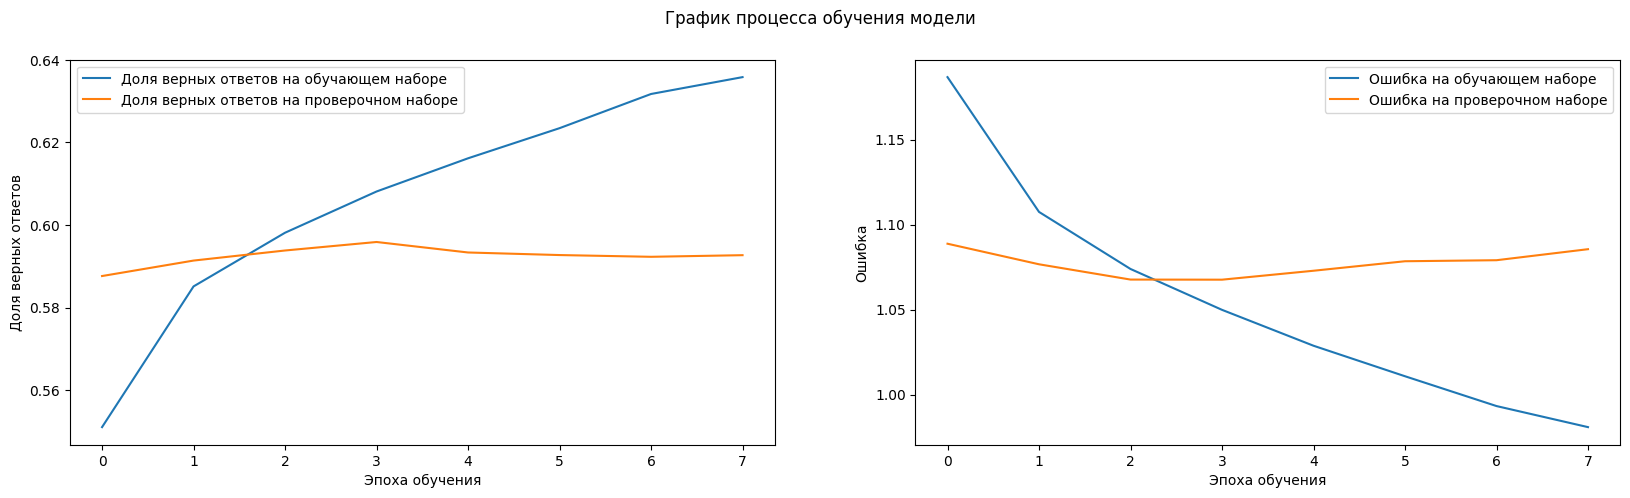

3113/3113 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


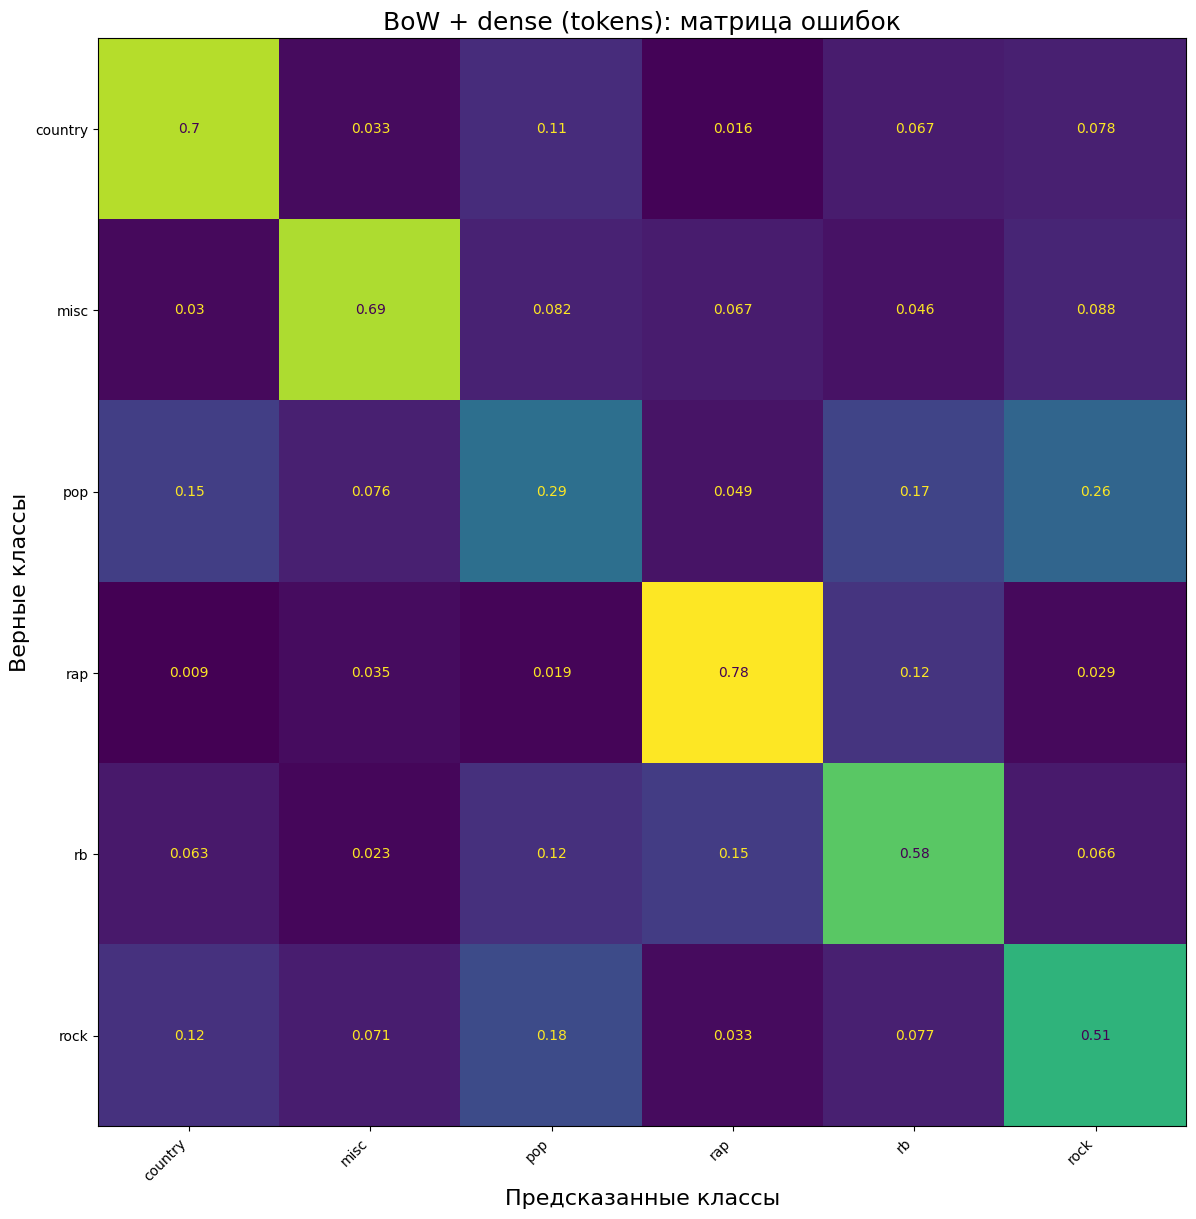

----------------------------------------------------------------------------------------------------
Нейросеть: BoW + dense (tokens)
Класс: country               70% к классу country              - верно
Класс: misc                  69% к классу misc                 - верно
Класс: pop                   29% к классу pop                  - верно
Класс: rap                   78% к классу rap                  - верно
Класс: rb                    58% к классу rb                   - верно
Класс: rock                  51% к классу rock                 - верно

Средняя точность распознавания:  59%


In [24]:
# Применение модели

model_text_bow_dense = Sequential()
model_text_bow_dense.add(Dense(100, input_dim=VOCAB_SIZE, activation="relu"))
model_text_bow_dense.add(Dropout(0.4))
model_text_bow_dense.add(Dense(100, activation='relu'))
model_text_bow_dense.add(Dropout(0.4))
model_text_bow_dense.add(Dense(100, activation='relu'))
model_text_bow_dense.add(Dropout(0.4))
model_text_bow_dense.add(Dense(CLASS_COUNT, activation='softmax'))

# Входные данные подаются в виде векторов bag of words
compile_train_eval_model(model_text_bow_dense,
                         X_train, y_train,
                         X_test, y_test,
                         epochs=8,
                         batch_size=32,
                         cm_size=(16, 16),
                         class_labels=CLASS_LIST,
                         title='BoW + dense (tokens)')

In [25]:
# Сохраняем веса модели
model_text_bow_dense.save('model_text_bow_dense.h5')

### Предсказание модели

In [26]:
# Загружаем веса модели
model_tbd = load_model('model_text_bow_dense.h5')
model_tbd

<Sequential name=sequential_2, built=True>

In [35]:
# Список тестов песен для предсказания жанра
item_list = ["You and me We used to be together Everyday together always I really feel That I'm losing my best friend I can't believe This could be the end It looks as though you're letting go And if it's real Well I don't want to know Don't speak I know just what you're saying So please stop explaining Don't tell me cause it hurts Don't speak I know what you're thinking I don't need your reasons Don't tell me cause it hurts Our memories Well, they can be inviting But some are altogether Mighty frightening As we die, both you and I With my head in my hands I sit and cry Don't speak I know just what you're saying So please stop explaining Don't tell me cause it hurts (no, no, no) Don't speak I know what you're thinking I don't need your reasons Don't tell me cause it hurts It's all ending I gotta stop pretending who we are... You and me I can see us dying...are we? Don't speak I know just what you're saying So please stop explaining Don't tell me cause it hurts (no, no, no) Don't speak I know what you're thinking I don't need your reasons Don't tell me cause it hurts Don't tell me cause it hurts! I know what you're saying So please stop explaining Don't speak, don't speak, don't speak, oh I know what you're thinking And I don't need your reasons I know you're good, I know you're good, I know you're real good Oh, la la la la la la La la la la la la Don't, Don't, uh-huh Hush, hush darlin' Hush, hush darlin' Hush, hush don't tell me tell me cause it hurts Hush, hush darlin' Hush, hush darlin' Hush, hush don't tell me tell me cause it hurts",
            "First things first I'ma say all the words inside my head I'm fired up and tired of the way that things have been, oh-ooh The way that things have been, oh-ooh Second thing second Don't you tell me what you think that I can be I'm the one at the sail, I'm the master of my sea, oh The master of my sea, oh I was broken from a young age Taking my sulking to the masses Writing my poems for the few That looked at me took to me, shook to me, feeling me Singing from heartache from the pain Take up my message from the veins Speaking my lesson from the brain Seeing the beauty through the... Pain! You made me a, you made me a believer, believer Pain! You break me down and build me up, believer, believer All the words inside my Believer You break me down you build me up, believer Pain All the words inside my Believer You break me down you build me up, believer Pain Third things third Send a prayer to the ones up above All the hate that you've heard has turned your spirit to a dove, oh-ooh Your spirit up above, oh-ooh I was choking in the crowd Living my brain up in the cloud Falling like ashes to the ground Hoping my feelings, they would drown But they never did, ever lived Ebbing and flowing, inhibited, limited Till it broke open and it rained down It rained down, like... Pain! You made me a, you made me a believer, believer Pain! You break me down and build me up, believer, believer All the words inside my Believer You break me down you build me up, believer Pain All the words inside my Believer You break me down you build me up, believer Pain",
            "Look, I was gonna go easy on you and not to hurt your feelings But I'm only going to get this one chance Something's wrong, I can feel it (Six minutes, Slim Shady, you're on) Just a feeling I've got, Like something's about to happen, but I don't know what If that means, what I think it means, we're in trouble, big trouble, And if he is as bananas as you say, I'm not taking any chances You were just what the doctor ordered I'm beginning to feel like a Rap God, Rap God All my people from the front to the back nod, back nod Now who thinks their arms are long enough to slapbox, slapbox? They said I rap like a robot, so call me Rapbot But for me to rap like a computer must be in my genes I got a laptop in my back pocket My pen'll go off when I half-cock it Got a fat knot from that rap profit Made a living and a killing off it Ever since Bill Clinton was still in office With Monica Lewinsky feeling on his nut-sack I'm an MC still as honest But as rude and as indecent as all hell Syllables, killaholic (Kill 'em all with) This slickety, gibbedy, hibbedy hip-hop You don't really wanna get into a pissing match with this rappidy rap Packing a Mac in the back of the Ac, Backpack rap crap, yep, yep, yackity-yak Now at the exact same time I attempt these lyrical acrobat stunts while I'm practicing that I'll still be able to break a motherfuckin' table Over the back of a couple of faggots and crack it in half Only realized it was ironic I was signed to Aftermath after the fact How could I not blow? All I do is drop F-bombs, feel my wrath of attack Rappers are having a rough time period, here's a maxipad It's actually disastrously bad for the wack While I'm masterfully constructing this masterpiece as I'm beginning to feel like a Rap God, Rap God All my people from the front to the back nod, back nod Now who thinks their arms are long enough to slapbox, slapbox? Let me show you maintaining this shit ain't that hard, that hard Everybody want the key and the secret to rap immortality like I have got Well, to be truthful the blueprint's simply rage and youthful exuberance Everybody loves to root for a nuisance Hit the earth like an asteroid, did nothing but shoot for the moon since MC's get taken to school with this music Cause I use it as a vehicle to bust a rhyme Now I lead a new school full of students Me? I'm a product of Rakim, Lakim Shabazz, 2Pac N- -W.A, Cube, Hey Doc, Ren, Yella, Eazy, thank you, they got Slim Inspired enough to one day grow up, blow up and be in a position To meet Run DMC, induct them, into the motherfuckin' Rock n' Roll Hall of Fame Even though I walk in the church and burst in a ball of flames Only Hall of Fame I be inducted in is the alcohol of fame On the wall of shame You fags think it's all a game 'til I walk a flock of flames Off a plank, and tell me what in the fuck are you thinking? Little gay looking boy So gay I can barely say it with a straight face looking boy (haha!) You witnessing a massacre Like you watching a church gathering take place looking boy Oy vey, that boy's gay, that's all they say looking boy You get a thumbs up, pat on the back And a way to go from your label everyday looking boy Hey, looking boy, what you say looking boy? I get a hell yeah from Dre looking boy I'mma work for everything I have Never ask nobody for shit, get outta my face looking boy Basically boy you're never gonna be capable To keeping up with the same pace looking boy I'm beginning to feel like a Rap God, Rap God All my people from the front to the back nod, back nod The way I'm racing around the track, call me Nascar, Nascar Dale Earnhardt of the trailer park, the White Trash God Kneel before General Zod this planet's Krypton, no Asgard, Asgard So you be Thor and I'll be Odin, you rodent, I'm omnipotent Let off then I'm reloading immediately with these bombs I'm totin' And I should not be woken I'm the walking dead, but I'm just a talking head, a zombie floating But I got your mom deep throating I'm out my ramen noodle, we have nothing in common, poodle I'm a doberman, pinch yourself in the arm and pay homage, pupil It's me, my honesty's brutal But it's honestly futile if I don't utilize what I do though For good at least once in a while So I wanna make sure somewhere In this chicken scratch I scribble and doodle Enough rhymes to maybe try to help Get some people through tough times But I gotta keep a few punchlines just in case cause even you unsigned Rappers are hungry looking at me like it's lunchtime I know there was a time where once I Was king of the underground, But I still rap like I'm on my Pharoahe Monch grind So I crunch rhymes, but sometimes when you combine Appeal with the skin color of mine You get too big and here they come trying to censor you Like that one line I said On I'm Back from the Mathers LP1 Where I tried to say I take seven kids from Columbine Put 'em all in a line, add an AK-47, a revolver and a nine See if I get away with it now that I ain't as big as I was But I've morphed into an immortal coming through the portal You're stuck in a timewarp from 2004 though And I don't know what the fuck that you rhyme for You're pointless as Rapunzel with fucking cornrows You're like normal, fuck being normal And I just bought a new Raygun from the future To just come and shoot ya like when Fabolous made Ray J mad Cause Fab said he looked like a fag at Mayweather's pad Singin' to a man while they played piano Man, oh man, that was a 24/7 special on the cable channel So Ray J went straight to the radio station the very next day ''Hey, Fab, I'mma kill you'' Lyrics coming at you at supersonic speed, (JJ Fad) Uh, sama lamaa duma lamaa you assuming I'm a human What I gotta do to get it through to you I'm superhuman Innovative and I'm made of rubber So that anything you say is ricocheting off of me and it'll glue to you I'm devastating, more than ever demonstrating How to give a motherfuckin' audience a feeling like it's levitating Never fading, and I know the haters are forever waiting For the day that they can say I fell off, they'd be celebrating Cause I know the way to get 'em motivated I make elevating music, you make elevator music Oh, he's too mainstream Well, that's what they do when they get jealous, they confuse it It's not hip hop, it's pop, cause I found a hella way to fuse it With rock, shock rap with Doc Throw on Lose Yourself and make 'em lose it I don't know how to make songs like that I don't know what words to use Let me know when it occurs to you While I'm ripping any one of these verses, that versus you It's curtains, I'm inadvertently hurtin' you How many verses I gotta murder to prove That if you were half as nice at songs, You can sacrifice virgins to (ughhh) School flunkie, pill junky But look at the accolades the skills brung me Full of myself, but still hungry I bully myself cause I make me do what I put my mind to And I'm a million leagues above you, Ill when I speak in tongues But it's still tongue in cheek, fuck you I'm drunk so Satan take the fucking wheel, I'm asleep in the front seat Bumping Heavy D and the Boys, still chunky, but funky But in my head there's something I can feel tugging and struggling Angels fight with devils and here's what they want from me They're asking me to eliminate some of the women hate But if you take into consideration the bitter hatred I had Then you may be a little patient and more sympathetic to the situation And understand the discrimination But fuck it, life's handing you lemons, make lemonade then But if I can't batter the women how the fuck am I supposed to bake them a cake then? Don't mistake it for Satan It's a fatal mistake if you think I need to be overseas And take a vacation to trip abroad And make her fall on her face and don't be a retard Be a king? Think not - why be a king when you can be a God?"]

In [45]:
# Предобработка текстов и инференс
x_test1 = tokenizer.texts_to_matrix(item_list)
y_test1 = model_tbd.predict(x_test1)
class_pred = np.argmax(y_test1, axis = 1)
item_class = dict(zip(item_list, CLASS_LIST[class_pred]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [46]:
CLASS_LIST

array(['country', 'misc', 'pop', 'rap', 'rb', 'rock'], dtype='<U7')

In [47]:
# Тексты песен и жанры, предсказанные моделью
item_class

{"You and me We used to be together Everyday together always I really feel That I'm losing my best friend I can't believe This could be the end It looks as though you're letting go And if it's real Well I don't want to know Don't speak I know just what you're saying So please stop explaining Don't tell me cause it hurts Don't speak I know what you're thinking I don't need your reasons Don't tell me cause it hurts Our memories Well, they can be inviting But some are altogether Mighty frightening As we die, both you and I With my head in my hands I sit and cry Don't speak I know just what you're saying So please stop explaining Don't tell me cause it hurts (no, no, no) Don't speak I know what you're thinking I don't need your reasons Don't tell me cause it hurts It's all ending I gotta stop pretending who we are... You and me I can see us dying...are we? Don't speak I know just what you're saying So please stop explaining Don't tell me cause it hurts (no, no, no) Don't speak I know what 